<a href="https://colab.research.google.com/github/ask350/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load handwritten digit dataset

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Viewing the image in data

In [8]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

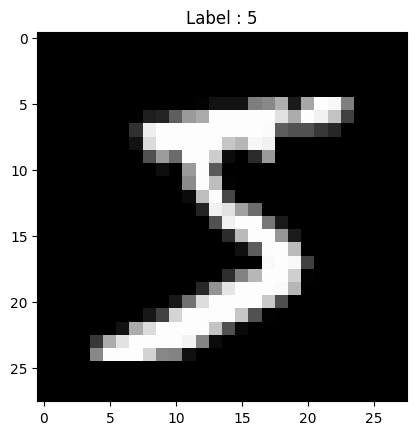

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap="grey")
plt.title(f"Label : {ytrain[0]}")
plt.show()

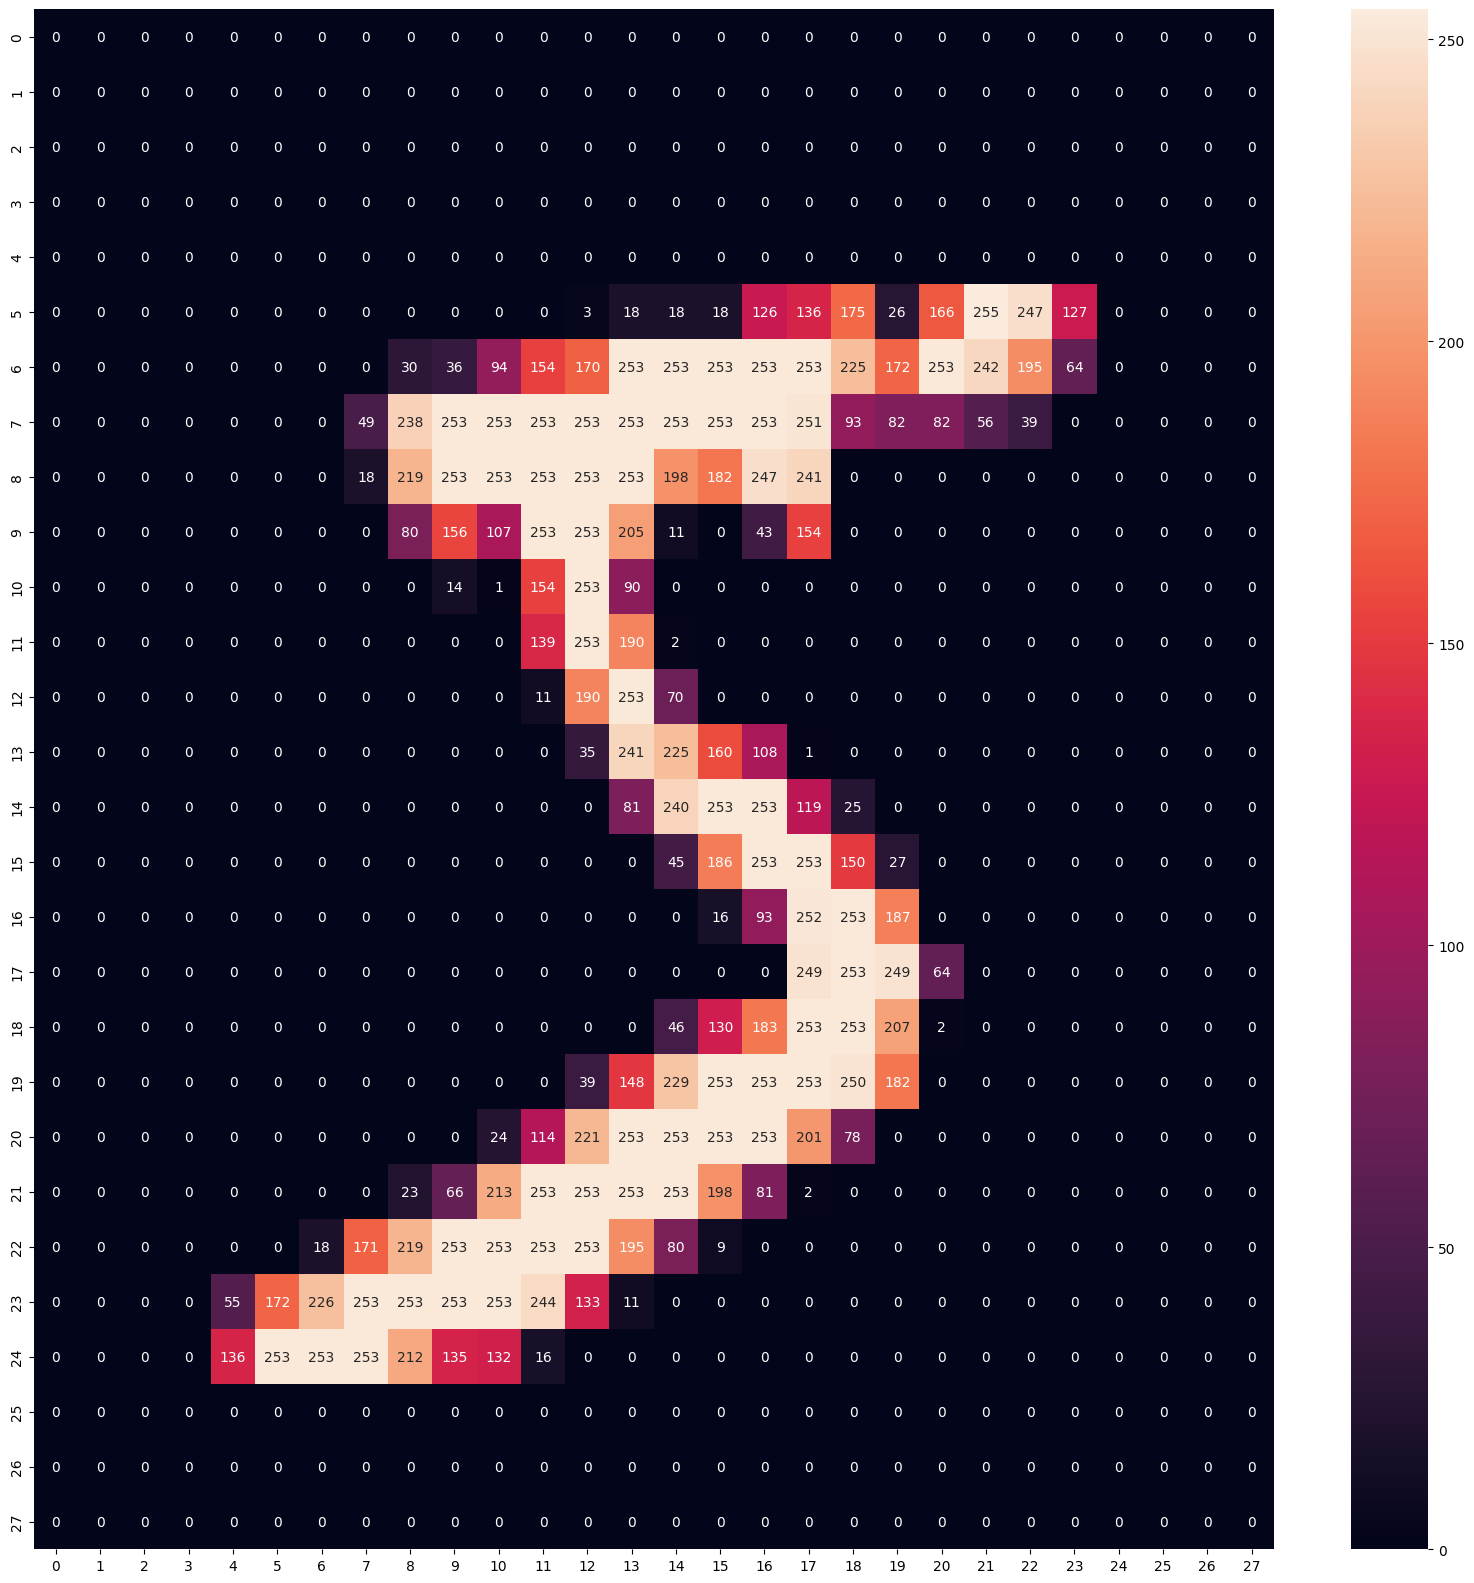

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(xtrain[0], annot=True, fmt="d")
plt.show()

### Show first 9 images

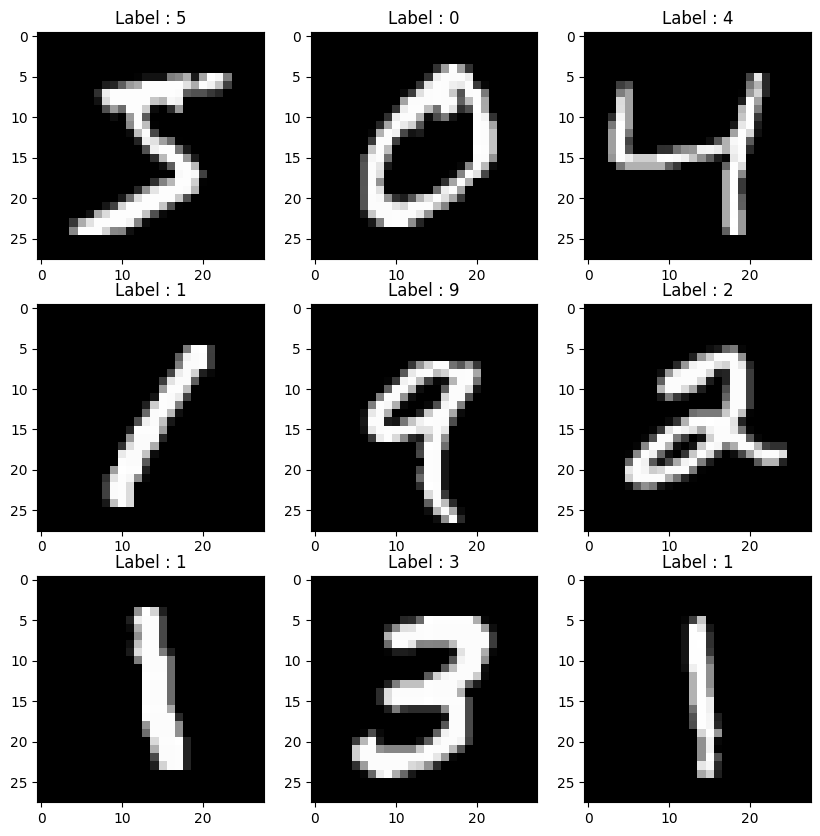

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(xtrain[i], cmap="gray")
    plt.title(f"Label : {ytrain[i]}")


In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtest.shape

(10000, 28, 28)

### Preprocess the data for training

In [14]:
xtrain_pre = xtrain.astype(float)/255
xtest_pre = xtest.astype(float)/255

In [15]:
xtrain_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
xtest_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain)
ytest_pre = to_categorical(ytest)

In [18]:
ytrain[0]

5

In [19]:
ytrain_pre[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
ytest[0]

7

In [21]:
ytest_pre[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Build the CNN

In [22]:
xtrain.shape

(60000, 28, 28)

In [23]:
input_shape = (28, 28, 1)

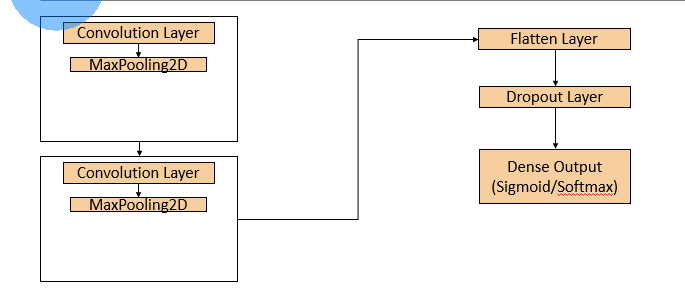

In [24]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
output_labels = len(np.unique(ytrain))
output_labels

10

In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical

In [27]:
# Initialize the model
model = Sequential()

# Provide the input layer
model.add(Input(shape=input_shape))

# First convolution layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation="relu"))

# First Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation="relu"))

# Second Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Add dropout layer
model.add(Dropout(rate=0.5))

# Add softmax output layer for multiclass classification
model.add(Dense(units=output_labels, activation="softmax"))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
hist = model.fit(xtrain_pre.reshape(-1, 28, 28, 1), ytrain_pre, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7648 - loss: 0.7691 - val_accuracy: 0.9787 - val_loss: 0.0819
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9628 - loss: 0.1209 - val_accuracy: 0.9840 - val_loss: 0.0566
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9730 - loss: 0.0890 - val_accuracy: 0.9867 - val_loss: 0.0484
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9768 - loss: 0.0761 - val_accuracy: 0.9880 - val_loss: 0.0426
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0662 - val_accuracy: 0.9895 - val_loss: 0.0396
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0559 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9834 - loss: 0.0511 - val_accuracy: 0.9903 - val_loss: 0.0353
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy:

### Plot the learning curve

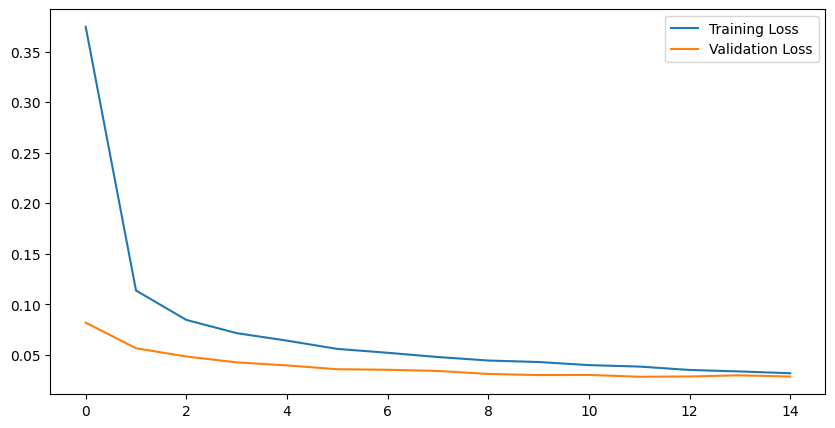

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Evaluate the model

In [32]:
model.evaluate(xtrain_pre.reshape(-1, 28, 28, 1), ytrain_pre)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9950 - loss: 0.0159


[0.016909515485167503, 0.994866669178009]

In [33]:
model.evaluate(xtest_pre.reshape(-1, 28, 28, 1), ytest_pre)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0292


[0.02518564835190773, 0.9919999837875366]

In [34]:
yprob_train = model.predict(xtrain_pre.reshape(-1, 28, 28, 1))
yprob_train

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[9.1229611e-12, 1.1128650e-11, 4.1781861e-10, ..., 2.8425202e-08,
        5.0033083e-07, 3.9286513e-07],
       [9.9999702e-01, 3.5807174e-15, 7.5532614e-07, ..., 3.5015536e-12,
        2.1870493e-08, 5.7240644e-08],
       [2.7877699e-14, 2.5536110e-07, 5.9235234e-09, ..., 4.8242423e-06,
        2.9882710e-07, 7.1787105e-07],
       ...,
       [4.3387459e-12, 7.4699584e-13, 2.8324871e-13, ..., 7.7371264e-13,
        7.4751682e-07, 4.9943865e-06],
       [3.3861238e-07, 1.0789611e-09, 9.5459939e-08, ..., 3.7970902e-12,
        2.1681157e-07, 1.5798321e-11],
       [2.2543358e-07, 4.5851105e-13, 3.2366634e-07, ..., 1.5809894e-08,
        9.9996698e-01, 3.2171960e-05]], dtype=float32)

In [35]:
yprob_train[0]

array([9.1229611e-12, 1.1128650e-11, 4.1781861e-10, 1.6949680e-03,
       9.7336809e-13, 9.9830413e-01, 9.1717077e-12, 2.8425202e-08,
       5.0033083e-07, 3.9286513e-07], dtype=float32)

In [36]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [37]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
xtest.shape

(10000, 28, 28)

In [39]:
yprob_test = model.predict(xtest_pre.reshape(-1, 28, 28, 1))
yprob_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.7752113e-09, 2.1856329e-10, 2.4590918e-06, 4.3690511e-06,
        2.6628972e-11, 3.4167197e-10, 5.2247565e-16, 9.9999297e-01,
        3.1262008e-08, 2.4667031e-07],
       [7.3832859e-07, 2.3347236e-07, 9.9999189e-01, 6.9857284e-09,
        3.8863156e-11, 3.5515566e-13, 6.1633236e-06, 1.8598333e-11,
        9.1054017e-07, 1.2705860e-12],
       [6.4631166e-08, 9.9908125e-01, 7.2837461e-06, 2.9719324e-08,
        4.6957959e-04, 2.8366884e-07, 2.3698087e-06, 2.8214999e-04,
        1.5640327e-04, 5.6345408e-07],
       [9.9983585e-01, 1.5003670e-12, 1.0937397e-05, 1.0097553e-08,
        3.2951856e-08, 8.7891401e-08, 1.4881193e-04, 3.0934497e-09,
        1.7851862e-06, 2.3983964e-06],
       [7.4512480e-10, 7.4338695e-11, 1.0562903e-09, 2.8585760e-11,
        9.9999809e-01, 1.2384978e-12, 1.5858701e-09, 3.6158023e-09,
        1.5855292e-08, 1.9668785e-06]], dtype=float32)

In [40]:
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [41]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

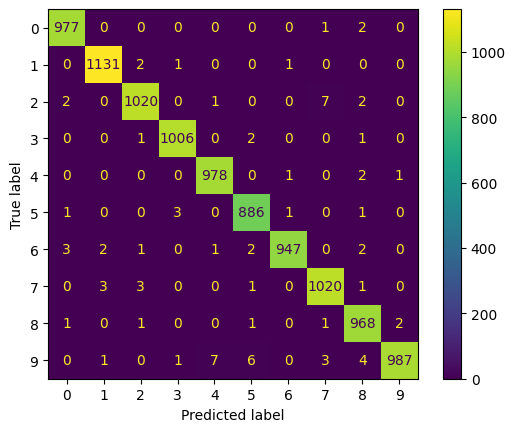

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## From above test, data has f1_macro of 0.99 > 0.8 hence it is a good model

In [44]:
import cv2

In [45]:
def predict_label(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()
    img = img.astype(float)/255
    probs = model.predict(img.reshape(1, 28, 28, 1))
    pred = np.argmax(probs, axis=1)
    return pred, np.max(probs)

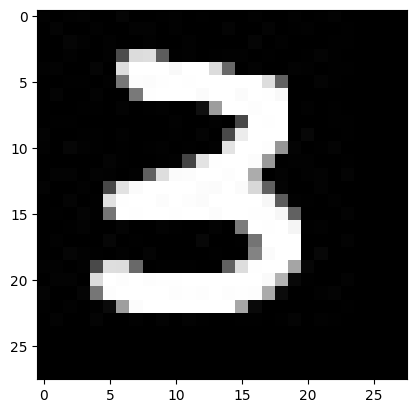

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


(array([3]), 1.0)

In [46]:
predict_label("/content/Img_3.jpg")

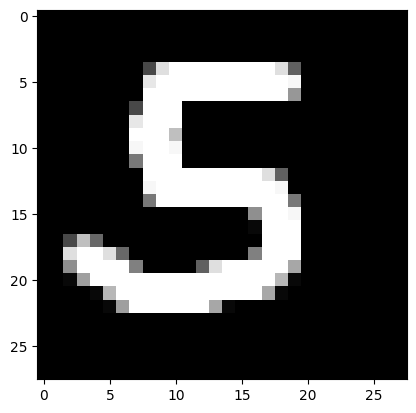

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(array([5]), 1.0)

In [47]:
predict_label("/content/Img_5.png")

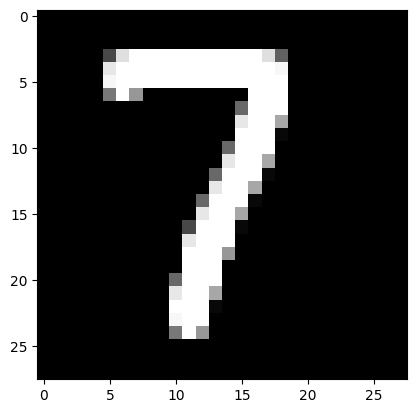

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([7]), 0.5864207)

In [48]:
predict_label("/content/Img_7.png")

### Save the model

In [49]:
model.save("DigitModel.keras")


### Load the model

In [50]:
from keras.models import load_model

In [51]:
m = load_model("/content/DigitModel.keras")

In [52]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)